# **Importación de librerías** 
Se importan las librerías necesarias para el análisis
- *pandas*: para la manipulación de datos.
- *numpy*: para operaciones numéricas.
- *matplotlib y seaborn*: para la visualización de datos.
- *missingno*: para visualizar datos faltantes en conjuntos de datos.
- *scipy (stats)*: para realizar análisis estadísticos en profundidad.
- *sklearn.preprocessing (StandardScaler)*: para normalizar los datos y evitar que algunas características dominen sobre otras.
- *data_util (util)*:  biblioteca personalizada que contiene funciones específicas para el proyecto. 
- *warnings*: permite controlar la emisión de advertencias durante la ejecución del código. 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
from sklearn.preprocessing import StandardScaler

import data_util as util

import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

# **Obtención de los datos**
* Cargar csv: Obtener los datos de la API.
* Convertir los datos cargados a un DataFrame de Python
* Analizar las características del DataFrame.

In [72]:

# Cargar csv
ruta = "../minidatathonF5_emma_bis/data/all-states-history.csv"
ruta_nuevoCSV = "../minidatathonF5_emma_bis/data/covid19_all.csv"
df = pd.read_csv(ruta, sep=',')
df.head(2)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0


In [73]:
# Comprobar la dimensión de los datos cargados
df.shape

(20780, 41)

In [74]:
# Identificación de los tipos datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  nega

## 3. Preparar datos

* Crear nuevas columnas
* Transformar columnas
* Seleccionar las columnas sobre las que realizar EDA


In [75]:
# Crear nuevas variables
df['mortality_rate'] = (df['death'] / df['positive'] * 100).round(2)
df['hospitalization_rate'] = (df['hospitalized'] / df['positive'] * 100).round(2)

In [102]:
# Calcular casos y muertes diarias
df['new_deaths'] = df.groupby('state')['death'].diff()
df['new_cases'] = df.groupby('state')['positive'].diff()

#Calcular promedio móvil de 7 días
df['cases_7day_avg'] = df.groupby('state')['new_cases'].rolling(7).mean().reset_index(0, drop=True)
df['deaths_7day_avg'] = df.groupby('state')['new_deaths'].rolling(7).mean().reset_index(0, drop=True)
df.head(2)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,mortality_rate,hospitalization_rate,new_deaths,new_cases,cases_7day_avg,deaths_7day_avg
20779,2020-01-13,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Convertir la fecha a formato datetime
# df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Ordenar por fecha
df = df.sort_values('date')
df.head(2)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,mortality_rate,hospitalization_rate,new_deaths,new_cases,cases_7day_avg,deaths_7day_avg
20779,2020-01-13,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,0,NaN,NaN,NaN,0.0,-0.285714,NaN


In [78]:
# Mostrar los valores únicos de la columna "state"
valores_unicos_state = df['state'].unique()
print(valores_unicos_state)

['WA' 'MA' 'VA' 'FL' 'NJ' 'NE' 'IN' 'CT' 'MI' 'RI' 'WY' 'NY' 'TX' 'VT'
 'WI' 'PA' 'IL' 'HI' 'CO' 'NC' 'CA' 'AZ' 'GA' 'NH' 'SC' 'OR' 'MD' 'DC'
 'OH' 'TN' 'NV' 'NM' 'KY' 'IA' 'DE' 'AR' 'AK' 'MN' 'KS' 'WV' 'ME' 'ID'
 'LA' 'AL' 'MO' 'MT' 'UT' 'SD' 'MS' 'ND' 'OK' 'GU' 'AS' 'MP' 'VI' 'PR']


In [79]:
# Explorar columnas del dataset, para crear,transformar y eliminar las que sean necesarias para el análisis
df.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [103]:
# Se seleccionan las columnas que interesan para las estadísticas
df_hist = df[['date', 'state', 'positive','positiveIncrease', 'negative', 'hospitalized', 'death', 'totalTestResults', 
            'mortality_rate','hospitalization_rate', 'new_deaths', 'deaths_7day_avg','new_cases', 'cases_7day_avg']]
df_hist.tail(5)

,date,state,positive,positiveIncrease,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate,new_deaths,deaths_7day_avg,new_cases,cases_7day_avg
32,2021-03-07,NE,203026.0,373,771128.0,6237.0,2113.0,2421684.0,1.04,3.07,0.0,4.428571,373.0,311.142857
31,2021-03-07,ND,100391.0,34,305912.0,3880.0,1478.0,1425146.0,1.47,3.86,0.0,0.857143,34.0,83.142857
30,2021-03-07,NC,872176.0,0,NaN,NaN,11502.0,9688838.0,1.32,NaN,0.0,41.428571,0.0,1946.857143
28,2021-03-07,MS,297581.0,260,1459374.0,9162.0,6808.0,1756955.0,2.29,3.08,3.0,18.142857,260.0,398.000000
0,2021-03-07,AK,56886.0,0,NaN,1293.0,305.0,1731628.0,0.54,2.27,0.0,2.142857,0.0,128.142857


2. ***Conversión de Formatos***

Aseguramos que las columnas están en los formatos de datos adecuados.

In [81]:
# Información general del DataFrame para asegurar que el tipo de datos es correcto para las estadísticas
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20780 entries, 20779 to 0
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  20780 non-null  object 
 1   state                 20780 non-null  object 
 2   positive              20592 non-null  float64
 3   positiveIncrease      20780 non-null  int64  
 4   negative              13290 non-null  float64
 5   hospitalized          12382 non-null  float64
 6   death                 19930 non-null  float64
 7   totalTestResults      20614 non-null  float64
 8   mortality_rate        19524 non-null  float64
 9   hospitalization_rate  12374 non-null  float64
 10  new_deaths            19874 non-null  float64
 11  deaths_7day_avg       19538 non-null  float64
 12  new_cases             20536 non-null  float64
 13  cases_7day_avg        20200 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 2.4+ MB


3. ***Exploración Inicial***

Realizaremos una exploración inicial de los datos para entender la estructura y posibles valores faltantes.

In [82]:
# Verificar valores nulos
df_hist.isnull().sum()

date                       0
state                      0
positive                 188
positiveIncrease           0
negative                7490
hospitalized            8398
death                    850
totalTestResults         166
mortality_rate          1256
hospitalization_rate    8406
new_deaths               906
deaths_7day_avg         1242
new_cases                244
cases_7day_avg           580
dtype: int64

In [83]:
# Porcentaje de datos faltantes
util.calc_missing(df_hist)

positive 188 / 20780= 0.90 %
negative 7490 / 20780= 36.04 %
hospitalized 8398 / 20780= 40.41 %
death 850 / 20780= 4.09 %
totalTestResults 166 / 20780= 0.80 %
mortality_rate 1256 / 20780= 6.04 %
hospitalization_rate 8406 / 20780= 40.45 %
new_deaths 906 / 20780= 4.36 %
deaths_7day_avg 1242 / 20780= 5.98 %
new_cases 244 / 20780= 1.17 %
cases_7day_avg 580 / 20780= 2.79 %


4. ***Tratamiento de Valores Faltantes***

Es importante manejar los valores faltantes de acuerdo a la naturaleza de los datos.

In [84]:
# Estadísticas descriptivas
df_hist.describe().round(1)

,positive,positiveIncrease,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate,new_deaths,deaths_7day_avg,new_cases,cases_7day_avg
count,20592.0,20780.0,13290.0,12382.0,19930.0,20614.0,19524.0,12374.0,19874.0,19538.0,20536.0,20200.0
mean,165156.0,1383.8,848224.6,9262.8,3682.2,2186935.8,2.8,9.2,-25.9,-26.1,-1400.3,-1415.0
std,326785.2,3023.6,1344501.4,12620.5,6281.4,4436508.2,2.0,9.1,61.3,52.1,3037.7,2887.4
min,0.0,-7757.0,0.0,1.0,0.0,0.0,0.0,1.4,-2559.0,-763.6,-71734.0,-43948.1
25%,5753.8,65.0,53941.2,985.2,161.2,104049.8,1.4,5.3,-25.0,-27.7,-1356.0,-1412.6
50%,46064.5,435.0,305972.0,4472.0,1108.0,655267.0,2.0,7.5,-7.0,-9.4,-449.5,-519.7
75%,177958.0,1335.2,1056611.2,12248.5,4387.5,2264766.5,3.5,11.1,-1.0,-2.1,-72.0,-108.0
max,3501394.0,71734.0,10186941.0,82237.0,54124.0,49646014.0,50.0,300.0,201.0,18.0,7757.0,846.6


<Axes: >

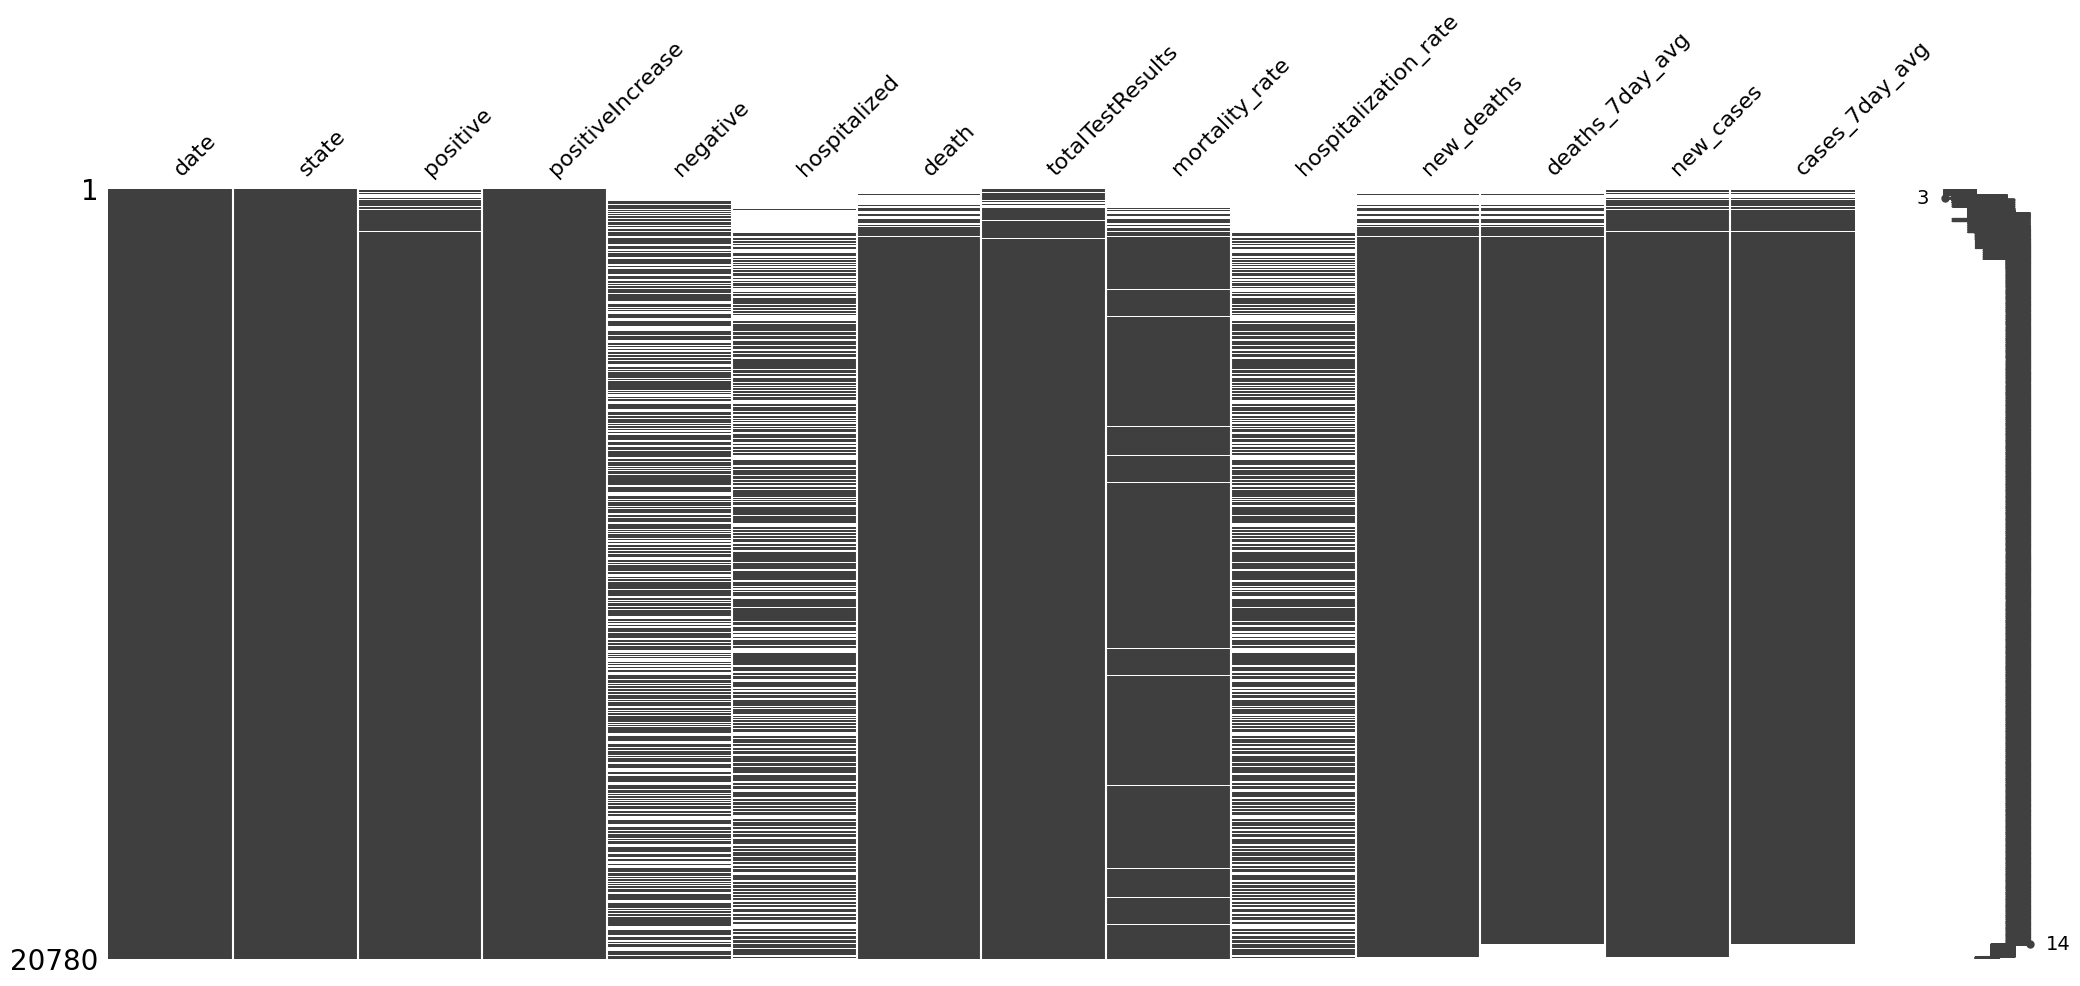

In [85]:
%matplotlib inline
msno.matrix(df_hist)

#####  Rellenar las columnas que contienen valore nulos.

* Imputar valores faltantes en columnas numéricas con la media

In [86]:
# Filtrar solo las columnas numéricas
numeric_columns = df_hist.select_dtypes(include=['number']).columns

# Imputar valores faltantes en columnas numéricas con la media
df_hist[numeric_columns] = df_hist[numeric_columns].fillna(df_hist[numeric_columns].mean())

df_hist.tail(2)


,date,state,positive,positiveIncrease,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate,new_deaths,deaths_7day_avg,new_cases,cases_7day_avg
28,2021-03-07,MS,297581.0,260,1.459374e+06,9162.0,6808.0,1756955.0,2.29,3.08,-25.918134,-26.108872,-1400.29105,-1415.0071
0,2021-03-07,AK,56886.0,0,8.482246e+05,1293.0,305.0,1731628.0,0.54,2.27,-25.918134,-26.108872,-1400.29105,-1415.0071


Verificar si todavia hay valores nulos para las columnas selecionadas

In [87]:
df_hist.isnull().sum()

date                    0
state                   0
positive                0
positiveIncrease        0
negative                0
hospitalized            0
death                   0
totalTestResults        0
mortality_rate          0
hospitalization_rate    0
new_deaths              0
deaths_7day_avg         0
new_cases               0
cases_7day_avg          0
dtype: int64

5. ***Tratamiento de outliers***

Empezamos por analizar si hay valores atípico en nuestro conjunto de datos y luego identificamos por medio de las gráficas de bigotes (BoxPlot), cuáles son los valores que están fuera del Rango Intercuartil".

In [88]:
# funcion que dado un determinado dataframe genera una tabla con los valores de parámetros de Cuartiles que vamos aplicar en el
# tramamiento de Outiers.
def calcular_estadisticas(df_hist):
    # Crear un nuevo DataFrame para almacenar los resultados de los cuartiles
    resultados_df = pd.DataFrame(
        columns=[
            "Columna",
            "Cuartil 0.25",
            "Cuartil 0.50",
            "Cuartil 0.75",
            "Rango intercuartil",
        ]
    )

    # Crea una lista con las variables que queremos verificar los cuartiles
    numeric_columns = [
        "positive",
        "positiveIncrease",
        "negative",
        "hospitalized",
        "death",
        "totalTestResults",
        "mortality_rate",
        "hospitalization_rate",
        "new_deaths", 
        "deaths_7day_avg",
        "new_cases", 
        "cases_7day_avg",
    ]


    # Calcular los cuartiles y los rangos intercuartiles para cada columna
    for columna in numeric_columns:
        Q1 = df_hist[columna].quantile(0.25)
        Q2 = df_hist[columna].quantile(0.50)
        Q3 = df_hist[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        new_row = pd.DataFrame(
            {
                "Columna": columna,
                "Cuartil 0.25": Q1,
                "Cuartil 0.50": Q2,
                "Cuartil 0.75": Q3,
                "Rango intercuartil": IQR,
                "Limite inferior": limite_inferior,
                "Limite superior": limite_superior,
            },
            index=[0],
        )

        resultados_df = pd.concat([resultados_df, new_row], ignore_index=True)

    # retorna un nuevo DataFrame (resultados_df) con los resultados
    return resultados_df.head(15).round(2)

In [89]:
%%time 
# LLama la función para conocernos los valores de los parámetros del procesos de los cuartiles que iremos aplicar a 
# nuestro conjunto de datos. Esta tabla tambien sirve para la documentación del proyecto.
calcular_estadisticas(df_hist)

CPU times: total: 15.6 ms
Wall time: 23.9 ms


,Columna,Cuartil 0.25,Cuartil 0.50,Cuartil 0.75,Rango intercuartil,Limite inferior,Limite superior
0,positive,5905.75,47410.00,175614.00,169708.25,-248656.62,430176.38
1,positiveIncrease,65.00,435.00,1335.25,1270.25,-1840.38,3240.62
2,negative,178087.75,848224.62,848224.62,670136.87,-827117.56,1853429.93
3,hospitalized,2927.50,9262.76,9262.76,6335.26,-6575.39,18765.66
4,death,183.00,1260.50,4159.00,3976.00,-5781.00,10123.00
5,totalTestResults,106460.25,670234.50,2243481.25,2137021.00,-3099071.25,5449012.75
6,mortality_rate,1.48,2.18,3.39,1.91,-1.39,6.26
7,hospitalization_rate,6.68,9.16,9.16,2.48,2.95,12.89
8,new_deaths,-25.92,-8.00,-1.00,24.92,-63.30,36.38
9,deaths_7day_avg,-26.11,-10.86,-2.43,23.68,-61.63,33.09


### Gráficas (Situación Actual)

Diagrama de Caja y Bigotes (BoxPlot)

In [91]:
# Genera la gráfica de Bigote con todas las variables juntas
def generar_grafica_boxplot(dataframe):
    # Definir el tamaño de la figura
    plt.figure(figsize=(12, 8))  # ancho/alto

    # Configuración del layout de la gráfica
    plt.grid(True)  # Mostrar cuadrícula
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x
    # plt.yticks(rotation=45)   # Rotar etiquetas del eje y
    plt.yticks(range(0, 301, 30))  # Rango de valores en el eje y
    plt.rcParams.update({"font.size": 10})  # Cambiar tamaño de la fuente

    # Código para generar la gráfica
    boxplot = dataframe.boxplot(
        column=[
        "positive",
        "positiveIncrease",
        "negative",
        "hospitalized",
        "death",
        "totalTestResults",
        "mortality_rate",
        "hospitalization_rate",
        "new_deaths", 
        "deaths_7day_avg",
        "new_cases", 
        "cases_7day_avg",
        ],
        return_type="axes",
        showmeans=True
    )
    return boxplot

CPU times: total: 78.1 ms
Wall time: 157 ms


matplotlib.axes._axes.Axes

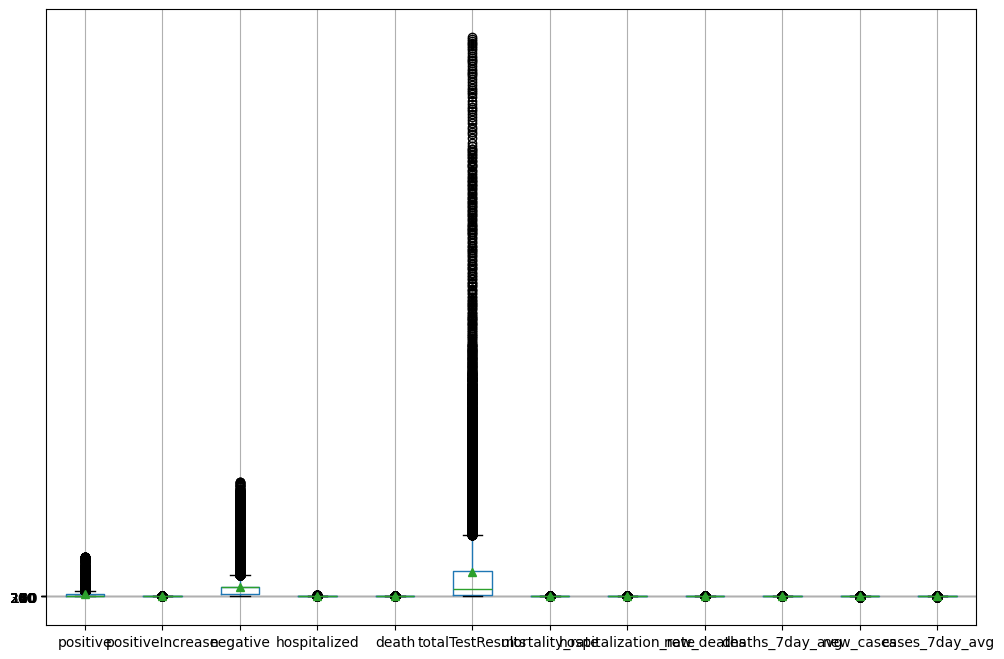

In [92]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(df_hist)
type(grafica)

Proceso de limpieza de outliers

In [93]:
# Define una función llamada "outliers" que devuelve una lista de valores atípicos basados em el IQR
# IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(df_hist, ft):
    Q1 = df_hist[ft].quantile(0.25)
    Q3 = df_hist[ft].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    ls = df_hist.index[(df_hist[ft] < limite_inferior) | (df_hist[ft] > limite_superior)]

    return ls

In [94]:
%%time 
# Busca y recopila los índices de los valores atípicos (outliers) en las columnas especificadas del conjunto de datos "data"

# crea una lista vacía para almacenar los índices
index_list = []
for column in [
        "positive",
        "positiveIncrease",
        "negative",
        "hospitalized",
        "death",
        "totalTestResults",
        "mortality_rate",
        "hospitalization_rate",
        "new_deaths", 
        "deaths_7day_avg",
        "new_cases", 
        "cases_7day_avg",
]:
        index_list.extend(outliers(df_hist, column))

CPU times: total: 0 ns
Wall time: 27.3 ms


In [95]:
# Define una función que devuelve un dataframe (marco de datos) limpio, sin valores atípicos
def eliminar(df_hist, columna):
    columna = sorted(set(columna))
    df_hist = df_hist.drop(columna)
    return df_hist

In [96]:
%%time 
data_limpio = eliminar(df_hist, index_list)
data_limpio.head(2)

CPU times: total: 0 ns
Wall time: 3 ms


,date,state,positive,positiveIncrease,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate,new_deaths,deaths_7day_avg,new_cases,cases_7day_avg
20779,2020-01-13,WA,165155.96926,0,848224.622047,9262.762478,3682.216859,2.186936e+06,2.763952,9.164449,-25.918134,-26.108872,-1400.29105,-1415.007100
20778,2020-01-14,WA,0.00000,0,848224.622047,9262.762478,3682.216859,2.186936e+06,2.763952,9.164449,-25.918134,-26.108872,0.00000,-0.285714


In [97]:
data_limpio.shape

(12586, 14)

CPU times: total: 62.5 ms
Wall time: 118 ms


matplotlib.axes._axes.Axes

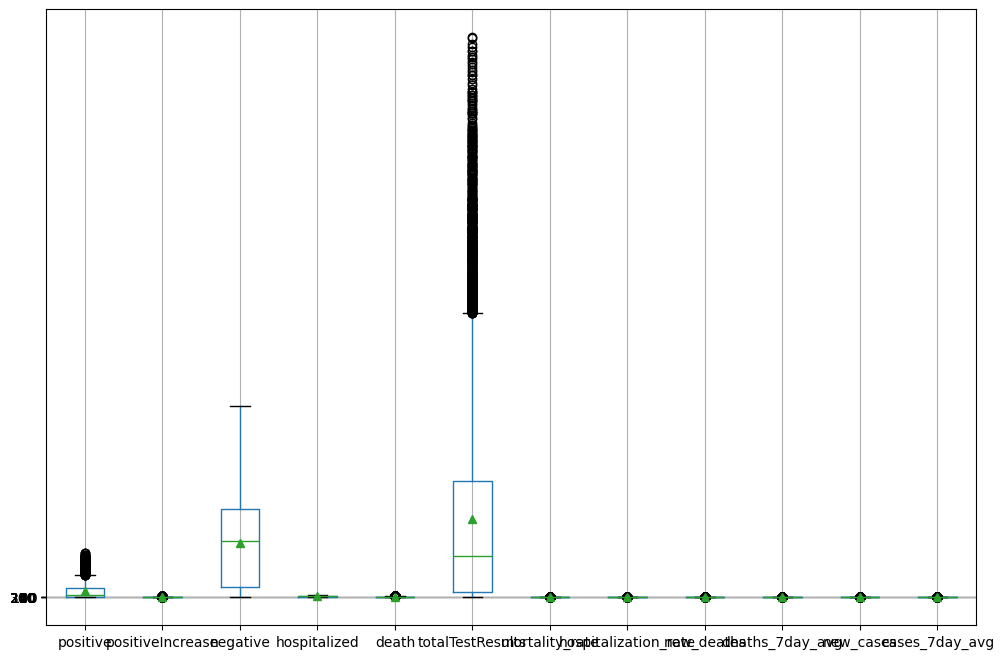

In [98]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(data_limpio)
type(grafica)

In [99]:
# Guardar csv
data_limpio.to_csv(ruta_nuevoCSV, index=False)